In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/weather_classification_data.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
np.unique(df['Weather Type'], return_counts=True)

(array(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype=object),
 array([3300, 3300, 3300, 3300]))

# **Feature Encoding**

In [ ]:
X = df.drop('Weather Type', axis=1)
y = df.iloc[::, -1]

In [ ]:
# Encoding data categorical di variabel independent
!pip install feature_engine
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder

encoder = OrdinalEncoder(
    variables=['Cloud Cover', 'Season', 'Location'],
    encoding_method='arbitrary'
)

encoder.fit(X)

X = encoder.transform(X)

* cloud cover: 0 = partly cloudy, 1 = clear, 2 = overcast, 3 = cloudy
* season: 0 = winter, 1 = spring, 2 = summer , 3 = autumn
* location: 0 = inland, 1 = mountain, 2 = coastal

In [ ]:
# Encoding data di variabel dependent
le = LabelEncoder()
le.fit(y)

y = le.transform(y)

0 = cloudy, 1 = rainy, 2 = snowy, 3 = sunny

In [ ]:
df = pd.concat([X, pd.DataFrame(y, columns=['Weather Type'])], axis=1)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,1
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,0
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,3
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,3
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,1,1
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,2
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,0
13198,3.0,76,10.0,94.0,2,984.27,0,0,2.0,0,2


# **DATA CLEANSING**

In [ ]:
# Checking missing and duplicated values
print(f'There are {df.isna().sum().sum()} missing values in the dataset')
print(f'There are {df.duplicated().sum()} duplicate values in the dataset')

There are 0 missing values in the dataset
There are 0 duplicate values in the dataset


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

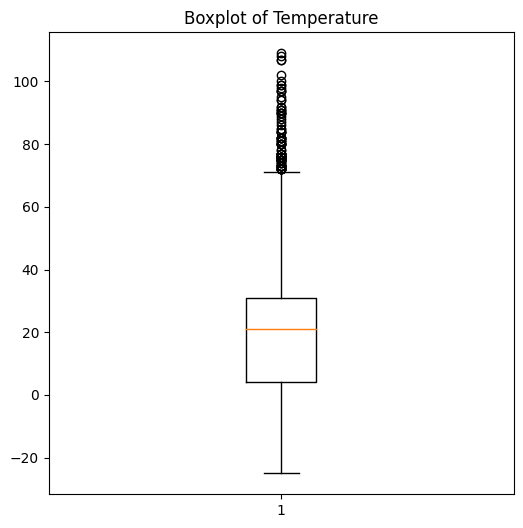

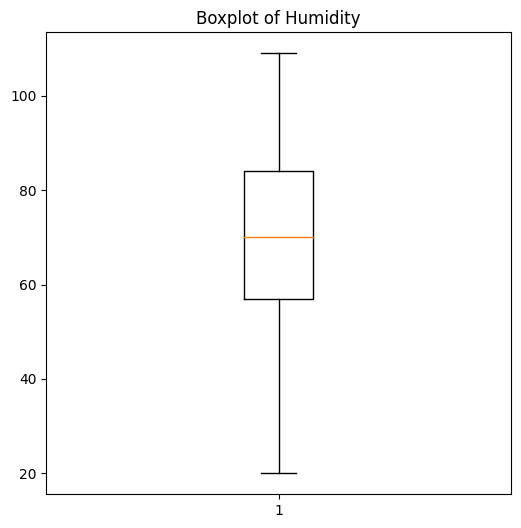

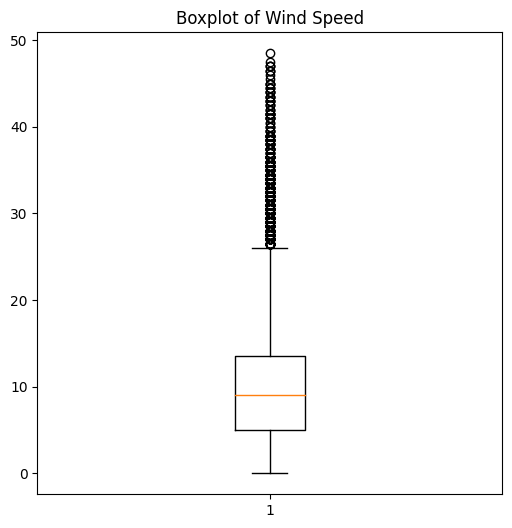

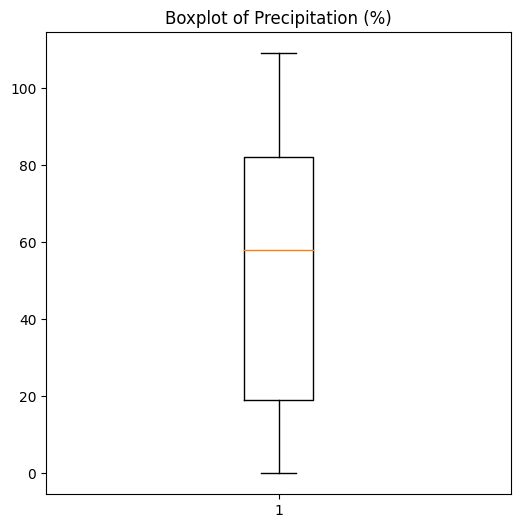

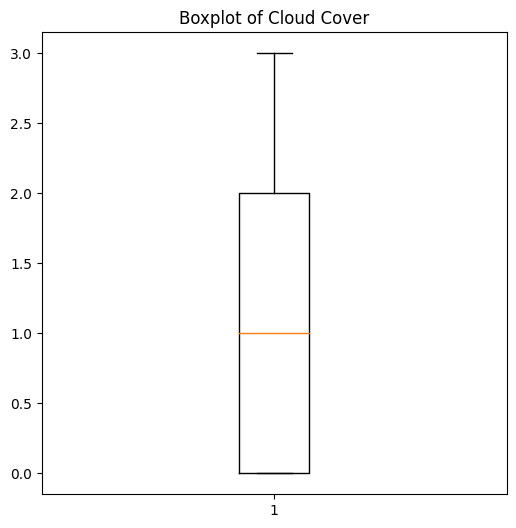

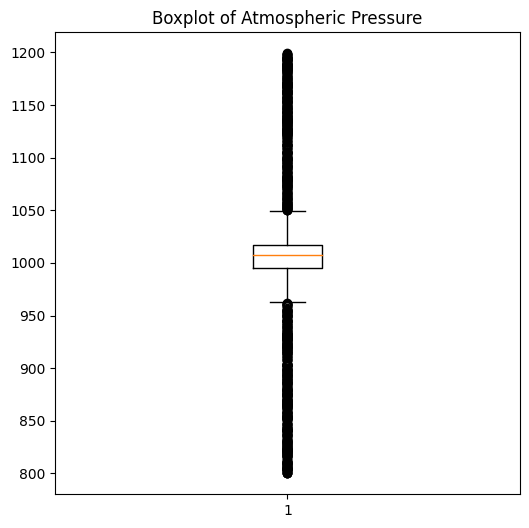

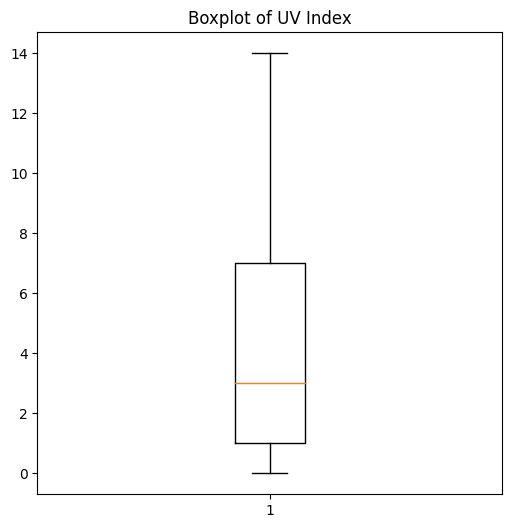

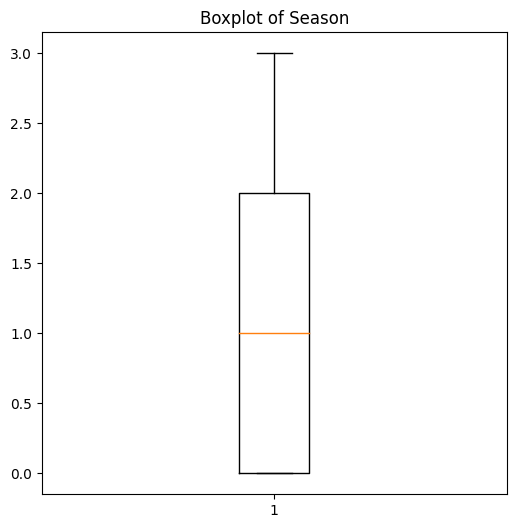

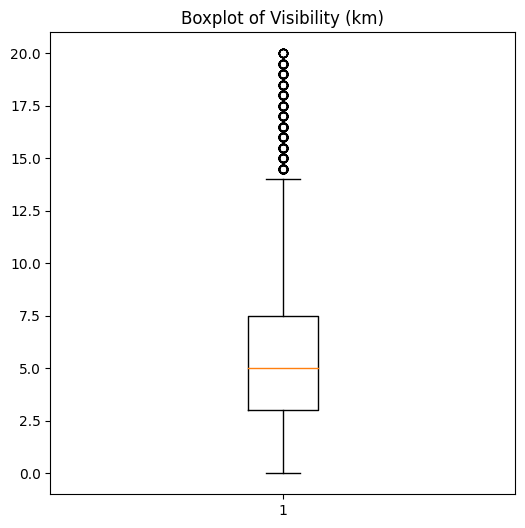

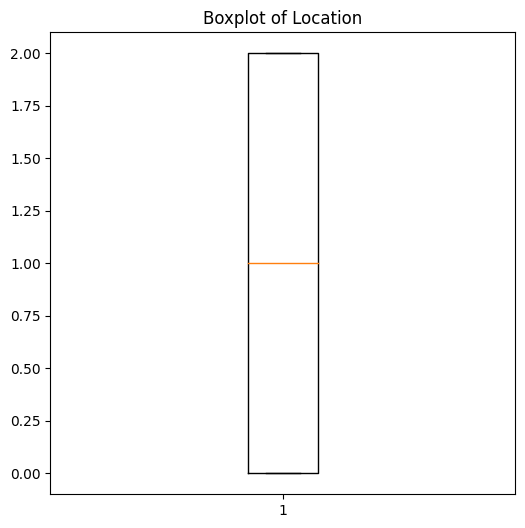

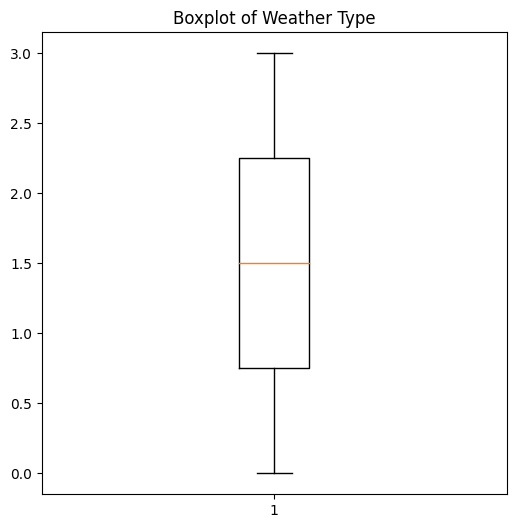

In [ ]:
import matplotlib.pyplot as plt
for col in numeric_columns:
    plt.figure(figsize=(6, 6))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

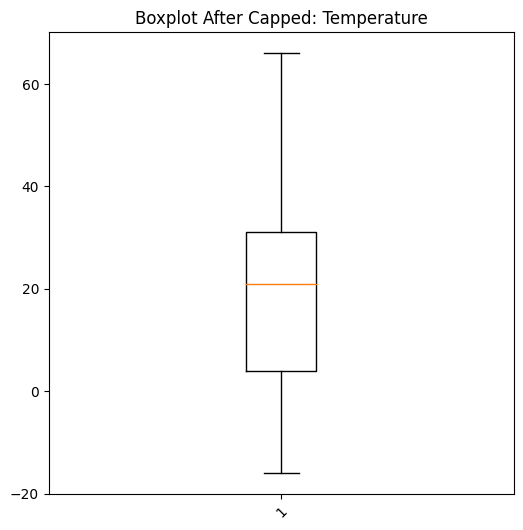

In [ ]:
def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_capped = df.copy()

cap_variables = ['Temperature']

for column in cap_variables:
    df_capped = cap_outliers(df, column)

# Verify the changes by plotting the boxplot again
plt.figure(figsize=(6, 6))

for col in cap_variables:
  plt.boxplot(df_capped[col])
  plt.title(f'Boxplot After Capped: {col}')
  plt.xticks(rotation=45)
  plt.show()

# **SPLITTING THE DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
print(X_train)

       Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
10918         25.0        72        15.0               87.0            2   
1361          66.0       107        13.0              109.0            0   
6260          23.0        99         6.0               79.0            0   
10848          2.0        95         1.5               74.0            2   
4014          -7.0        92         9.0               61.0            2   
...            ...       ...         ...                ...          ...   
13123          1.0        79         2.5               83.0            2   
3264          -4.0        65         7.5               58.0            0   
9845          30.0        59         8.5                5.0            1   
10799         13.0        34         4.0               89.0            0   
2732          12.0        71        19.5               77.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
10918       

In [ ]:
print(y_train)

[1 0 3 ... 3 2 1]


In [ ]:
print(X_test)

       Temperature  Humidity  Wind Speed  Precipitation (%)  Cloud Cover  \
3744          29.0        70        11.5               80.0            0   
9459          -8.0        92         2.5               70.0            2   
2875          12.0        71         4.0               13.0            0   
3232          27.0        61         8.0               21.0            2   
499            3.0        74        15.5               92.0            2   
...            ...       ...         ...                ...          ...   
7041           2.0        78        13.0               35.0            2   
6667          42.0        24         3.0               12.0            0   
11378        -12.0        97        29.5               71.0            2   
7129          33.0        60         4.5               14.0            1   
4484          21.0        85         8.0               87.0            2   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  
3744        

In [ ]:
print(y_test)

[1 2 0 ... 2 3 1]


# **FEATURE SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Get the column names for the selected indices
selected_columns = X_train.columns[[0, 1, 2, 3, 5, 6, 8]].tolist()

# Fit and transform using the column names
X_train.loc[:, selected_columns] = sc.fit_transform(X_train.loc[:, selected_columns])
X_test.loc[:, selected_columns] = sc.transform(X_test.loc[:, selected_columns])

# **Training Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# List of models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Kernel SVM': SVC(kernel='rbf'),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Find the best model based on accuracy
best_model = max(accuracy_results, key=accuracy_results.get)

# Print results
print("Akurasi masing-masing model:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy * 100:.2f}%")

print(f"\nModel dengan akurasi terbaik: {best_model} dengan akurasi {accuracy_results[best_model] * 100:.2f}%")


Akurasi masing-masing model:
KNN: 90.18%
SVM: 91.46%
Kernel SVM: 91.46%
Naive Bayes: 86.09%
Decision Tree: 91.59%
Random Forest: 92.17%

Model dengan akurasi terbaik: Random Forest dengan akurasi 92.17%


In [ ]:
y_pred = models[best_model].predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
# Reshape both y_pred and y_test to be column vectors and concatenate them side-by-side to see predictions and actual values together in one array.

[[1 1]
 [2 2]
 [0 0]
 ...
 [2 2]
 [3 3]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy: ", accuracy_score(y_test, y_pred))

[[887  48  23  34]
 [ 38 926  18  17]
 [ 24  20 934  21]
 [ 26  23  18 903]]
accuracy:  0.9217171717171717


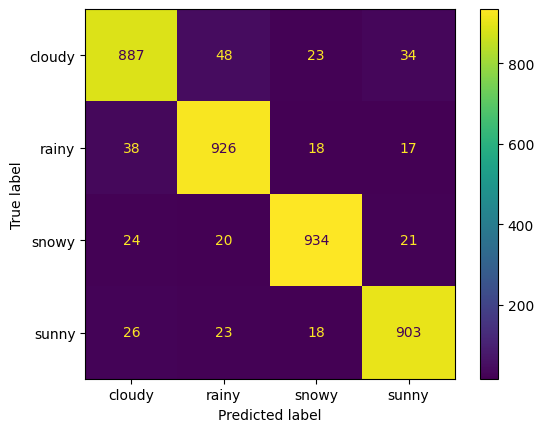

In [ ]:
# ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[auto]).plot()

labels = np.unique(y_test)  # atau bisa menggunakan y_pred tergantung kebutuhan

# Menampilkan confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=("cloudy", "rainy", "snowy", "sunny"))
disp.plot()

# **Predicting new result**

In [ ]:
new_data = pd.DataFrame({
    'Temperature': [38.0],
    'Humidity': [83],
    'Wind Speed': [1.5],
    'Precipitation (%)': [82.0],
    'Cloud Cover': [1],  # Categorical feature
    'Atmospheric Pressure': [1026.25],
    'UV Index': [7],
    'Season': [1],  # Categorical feature
    'Visibility (km)': [1.0],
    'Location': [2]  # Categorical feature
})

In [ ]:
# 1. Apply the same transformations to new_data
new_data_encoded = encoder.transform(new_data)  # Encode categorical variables
new_data_encoded[selected_columns] = sc.transform(new_data_encoded[selected_columns])  # Standardize numerical columns

# 2. Predict the result using the trained classifier
new_prediction = models[best_model].predict(new_data_encoded)

# 3. Decode the prediction to get the original class label (optional, if you want the original label)
new_prediction_label = le.inverse_transform(new_prediction)

print(f"Cuaca yang di prediksi: {new_prediction_label[0]}")


Cuaca yang di prediksi: Sunny


/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Cloud Cover, Season, Location.
  warnings.warn(


# **Giving Activity Recomendation**

In [ ]:
# Defining lists for indoor and outdoor activities for different weather conditions

rainy_indoor = [
    "Membaca buku atau novel favorit",
    "Bermain board games atau kartu dengan teman/keluarga",
    "Menonton film atau serial TV maraton",
    "Memasak resep baru di dapur",
    "Bermeditasi atau melakukan yoga untuk relaksasi",
    "Menulis jurnal atau blog pribadi",
    "Mengerjakan proyek seni seperti melukis atau membuat kerajinan tangan",
    "Belajar keterampilan baru secara online (kursus, coding, bahasa)",
    "Bermain video game",
    "Mengatur ulang atau mendekorasi ulang ruang dalam rumah"
]

rainy_outdoor = [
    "Berjalan-jalan dengan payung di sekitar lingkungan",
    "Fotografi hujan atau lanskap yang basah",
    "Berburu kafe yang nyaman untuk menikmati kopi",
    "Menjelajahi taman kota dengan perlengkapan jas hujan",
    "Mengunjungi museum atau galeri seni terdekat",
    "Bersepeda di jalan setapak dengan perlengkapan hujan",
    "Berjalan di hutan atau taman alami saat hujan gerimis",
    "Mendaki bukit kecil dengan peralatan anti air",
    "Mengikuti kelas dansa atau senam di tempat tertutup",
    "Mengambil foto estetik tetesan hujan di jendela atau genangan air"
]

cloudy_indoor = [
    "Membuat podcast atau merekam vlog",
    "Merajut atau membuat kerajinan tangan DIY",
    "Menyusun puzzle atau permainan strategi",
    "Belajar alat musik baru atau berlatih memainkan alat musik yang sudah dikuasai",
    "Menyusun daftar resolusi atau target pencapaian",
    "Membuat scrapbooking dari foto-foto kenangan",
    "Merawat tanaman dalam rumah atau membuat kebun mini",
    "Mencoba meditasi mindfulness",
    "Membuat daftar film klasik yang ingin ditonton",
    "Memperbarui profil media sosial atau portofolio pribadi"
]

cloudy_outdoor = [
    "Jalan-jalan santai di taman kota",
    "Fotografi langit berawan atau lanskap",
    "Jogging atau berlari di sekitar lingkungan",
    "Bersepeda santai di area hijau atau kompleks",
    "Bermain frisbee atau olahraga ringan dengan teman",
    "Piknik di tempat yang nyaman",
    "Membaca di bangku taman atau tempat outdoor",
    "Bermain sepak bola atau bola basket di lapangan terbuka",
    "Berburu lokasi street food yang lezat",
    "Berjalan-jalan di area bersejarah atau arsitektur tua"
]

sunny_indoor = [
    "Menonton video dokumenter yang menarik",
    "Merawat tanaman hias dalam rumah",
    "Bermain permainan virtual reality (VR)",
    "Menata dan membersihkan rumah dengan lebih detail",
    "Membuat konten video untuk media sosial",
    "Memperbaiki atau memperbarui perabotan rumah tangga",
    "Eksperimen membuat minuman segar seperti jus atau smoothies",
    "Berlatih tari atau ikut kelas tari online",
    "Menonton konser atau pertunjukan live streaming",
    "Menyusun rencana liburan ke tempat yang ingin dikunjungi"
]

sunny_outdoor = [
    "Hiking atau mendaki bukit/gunung",
    "Bersepeda keliling kota atau jalur khusus",
    "Piknik di taman dengan teman atau keluarga",
    "Olahraga air seperti berenang di kolam renang terbuka",
    "Bermain olahraga pantai seperti voli pantai atau frisbee",
    "Berjemur di pantai atau taman terbuka",
    "Fotografi alam atau potret outdoor",
    "Mengunjungi kebun binatang atau taman margasatwa",
    "Jalan-jalan santai sambil menikmati es krim atau kopi dingin",
    "Mengikuti kelas yoga di taman atau tempat outdoor"
]

snowy_indoor = [
    "Membuat kerajinan tangan Natal atau dekorasi musiman",
    "Menonton film atau serial TV bertema musim dingin",
    "Memasak makanan hangat seperti sup atau minuman coklat panas",
    "Mengerjakan proyek knitting atau merajut syal",
    "Menulis cerita pendek atau puisi",
    "Mengorganisir dan membersihkan lemari pakaian",
    "Membuat roti atau kue kering dengan resep baru",
    "Mengikuti kelas olahraga ringan secara online seperti yoga atau pilates",
    "Menonton video DIY untuk membuat dekorasi rumah musim dingin",
    "Mengikuti kelas seni online seperti melukis atau menggambar"
]

snowy_outdoor = [
    "Bermain ski atau snowboarding di lereng salju",
    "Membuat manusia salju di halaman atau taman",
    "Berjalan-jalan di hutan atau taman saat salju turun",
    "Bermain lempar-lemparan bola salju dengan teman",
    "Berburu pemandangan salju untuk fotografi alam",
    "Menyelenggarakan piknik musim dingin dengan minuman hangat",
    "Bersepatu es di atas danau atau arena es",
    "Bersepeda dengan fat bike di jalur bersalju",
    "Mendaki gunung atau bukit yang tertutup salju",
    "Membuat igloo atau benteng salju dengan anak-anak atau teman"
]

# Defining a dictionary to hold all the lists for easy access
activity_recommendations = {
    "Rainy Indoor": rainy_indoor,
    "Rainy Outdoor": rainy_outdoor,
    "Cloudy Indoor": cloudy_indoor,
    "Cloudy Outdoor": cloudy_outdoor,
    "Sunny Indoor": sunny_indoor,
    "Sunny Outdoor": sunny_outdoor,
    "Snowy Indoor": snowy_indoor,
    "Snowy Outdoor": snowy_outdoor
}

In [ ]:
import random

def get_activity_recommendation(season, location):
    key = f"{season.capitalize()} {location.capitalize()}" # menggabungkan season dan location untuk membuat key
    if key in activity_recommendations: # mengambil daftar aktivitas yang sesuai dengan key
        activities = activity_recommendations[key]
        return random.choice(activities)         # memilih aktivitas secara acak dari daftar
    else:
        return "Kategori tidak ditemukan. Pastikan memasukkan musim dan lokasi yang benar."

In [ ]:
# Contoh prediksi
season_input = new_prediction_label[0] # 0 untuk outdoor, 1 untuk indoor
# location_input = input("Masukkan lokasi (indoor, outdoor): ").strip().lower()
location_input = "Outdoor"

# Panggil fungsi dan tampilkan hasil
activity = get_activity_recommendation(season_input, location_input)
print(f"Cuaca: {season_input}")
print(f"Lokasi: {location_input}")
print(f"Rekomendasi aktivitas: {activity}")

Cuaca: Sunny
Lokasi: Outdoor
Rekomendasi aktivitas: Bermain olahraga pantai seperti voli pantai atau frisbee
